**Company Background:** A retail chain called SuperStore
sells a variety of consumer products in the United States. SuperStore's management wanted to improve overall sales and profits by gaining insights from their historical data. They collected data on past orders, including product categories, customer demographics, order quantities, sales amounts, discounts, and profits.


**Dataset Overview:** The dataset contains detailed transaction records from SuperStore from 2014 - 2017. Columns in the dataset include:

* ***Order Date:*** The date of each order.

* ***Customer Information:*** Customer ID, Customer Name, Segment, and Region.

* ***Product Information:*** Product Category, Sub-Category, Product ID, and Product Name.

* ***Sales and Financials:*** Sales Amount, Profit, Discounts Applied, and Order Quantity.


# **Preparation & Cleaning Data**

### *1. Import relevant libraries*




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/US Superstore data.xls'
df = pd.read_excel(file_path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## *2. Overview of the dataset*

We start by reviewing an overview of the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

This dataset include data types such as:
- Number: `int64`, `float64`, `datetime64[ns]`
- String: `object`


In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Furniture, Office Supplies, and Technology are 3 main types of product selling by this superstore

In [ ]:
df.shape

(9994, 21)

There are 9994 rows and 21 columns in this dataset

## *3. Remove unwanted data*

In [ ]:
df.drop(columns=['Country'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


As we are analysing a Superstore operating in the US. Therefore, the column "Country" is not nesscessary for this analysis, and it is removed from the dataset.

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns= ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city',
             'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount',
             'profit']

In [ ]:
df[['sales', 'quantity', 'discount', 'profit']].describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Generally, the dataset is clean, containing neither missing values nor duplicates. It categorizes products into three main groups: Furniture, Office Supplies, and Technology. For easier analysis, the timeline has been segmented by year and quarter, allowing for more detailed time-based insights. This structure aids in identifying trends, patterns, and performance variations across different periods.

In [ ]:
df['year'] = df['order_date'].dt.year
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [ ]:
df['quarter'] = pd.PeriodIndex(df.order_date, freq='Q')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,quarter
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016Q4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016Q4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016Q2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015Q4
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015Q4


# **Exploratory Data Analysis (EDA)**

**Big Question:** As a retailer with a diverse range of products:
*   Which product line yields the highest profit?
*   How can Superstore maximize its profitability?

**Objective of this analysis:** The report will focus on analysing the overall Sales and Profit performance. From there, we’ll break down the data to identify the specific product lines or segments that generate the most profit for Superstore. Finally, based on these insights, there are some recommendations for Superstore to enhance its profitability.

## *1. Revenue and Profit Overview*

In [ ]:
# Revenue & Profit Overview by quarters:
df_total_sales_profit = df.groupby(['year','quarter'])[['sales','profit']].sum().reset_index()
df_total_sales_profit['profit_margin'] = ((df_total_sales_profit['profit'])/(df_total_sales_profit['sales']))*100
df_total_sales_profit

,year,quarter,sales,profit,profit_margin
0,2014,2014Q1,74447.7960,3811.2290,5.119331
1,2014,2014Q2,86538.7596,11204.0692,12.946880
2,2014,2014Q3,143633.2123,12804.7218,8.914875
3,2014,2014Q4,179627.7302,21723.9541,12.093876
4,2015,2015Q1,68851.7386,9264.9416,13.456366
5,2015,2015Q2,89124.1870,12190.9224,13.678579
6,2015,2015Q3,130259.5752,16853.6194,12.938488
7,2015,2015Q4,182297.0082,23309.1203,12.786343
8,2016,2016Q1,93237.1810,11441.3708,12.271253
9,2016,2016Q2,136082.3010,16390.3394,12.044431


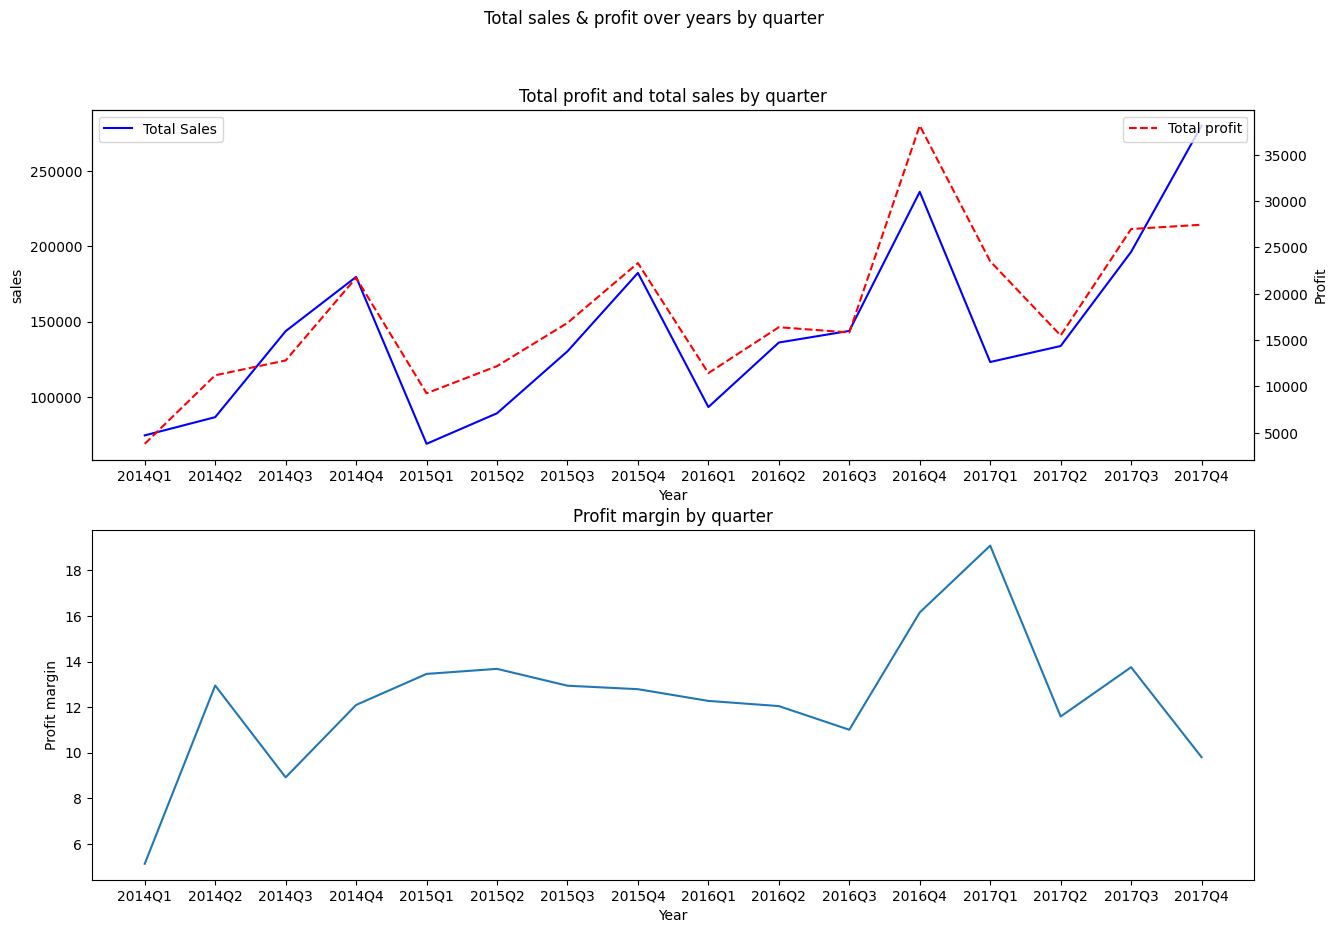

In [ ]:
# Visualize Total sales & profit over years by quarter:
df_total_sales_profit['quarter']= df_total_sales_profit['quarter'].astype(str)
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.lineplot(data=df_total_sales_profit,
             x='quarter',
             y='sales',
             color='blue',
             label='Total Sales')
plt.xlabel('Year')
plt.twinx()
sns.lineplot(data=df_total_sales_profit,
             x='quarter',
             y='profit',
             linestyle = '--',
             color='red',
             label='Total profit')
plt.ylabel('Profit')
plt.title('Total profit and total sales by quarter')

# Visualize Profit margin:
plt.subplot(212)
sns.lineplot(data=df_total_sales_profit,
             x='quarter',
             y='profit_margin')
plt.title('Profit margin by quarter')
plt.xlabel('Year')
plt.ylabel('Profit margin')

plt.suptitle('Total sales & profit over years by quarter')
plt.show()

* The chart illustrates the trends in Superstore's sales and profit by quarter over the years. Q1 sales tend to decline year after year, while Q4 consistently shows the highest revenue at the end of the year.

* The Superstore's business performance seems consistent, with profits and revenue increasing together, indicating that operating costs are well-managed. Although the profit margin was relatively low in the early stages, it showed sustainable growth over time, with particularly strong growth between Q4 2016 and Q1 2017.


## *2. Revenue and Profit by product category*

With a comprehensive business overview in place, we will now examine each Product Category individually to determine which contributes the most to sales and profit.

In [ ]:
# We get the product category dataset:
df_product = df.groupby(['year','category'])[['sales','profit']].sum().reset_index()

# In order to know how each category has contributed to sales and profit, we need to write function to calculate the sales and profit.
def calculate_sales_profit_percentage(df):
    df['sales_total'] = df.groupby('year')['sales'].transform('sum')
    df['sales_pct'] = df['sales'] / df['sales_total'] * 100

    df['profit_total'] = df.groupby('year')['profit'].transform('sum')
    df['profit_pct'] = df['profit'] / df['profit_total'] * 100
    return df
df_product = calculate_sales_profit_percentage(df_product)
df_product

,year,category,sales,profit,sales_total,sales_pct,profit_total,profit_pct
0,2014,Furniture,157192.8531,5457.7255,484247.4981,32.461263,49543.9741,11.015922
1,2014,Office Supplies,151776.4120,22593.4161,484247.4981,31.342735,49543.9741,45.602753
2,2014,Technology,175278.2330,21492.8325,484247.4981,36.196002,49543.9741,43.381325
3,2015,Furniture,170518.2370,3015.2029,470532.5090,36.239417,61618.6037,4.893332
4,2015,Office Supplies,137233.4630,25099.5338,470532.5090,29.165565,61618.6037,40.733695
5,2015,Technology,162780.8090,33503.8670,470532.5090,34.595019,61618.6037,54.372973
6,2016,Furniture,198901.4360,6959.9531,609205.5980,32.649312,81795.1743,8.509002
7,2016,Office Supplies,183939.9820,35061.2292,609205.5980,30.193416,81795.1743,42.864667
8,2016,Technology,226364.1800,39773.9920,609205.5980,37.157272,81795.1743,48.626331
9,2017,Furniture,215387.2692,3018.3913,733215.2552,29.375721,93439.2696,3.230324


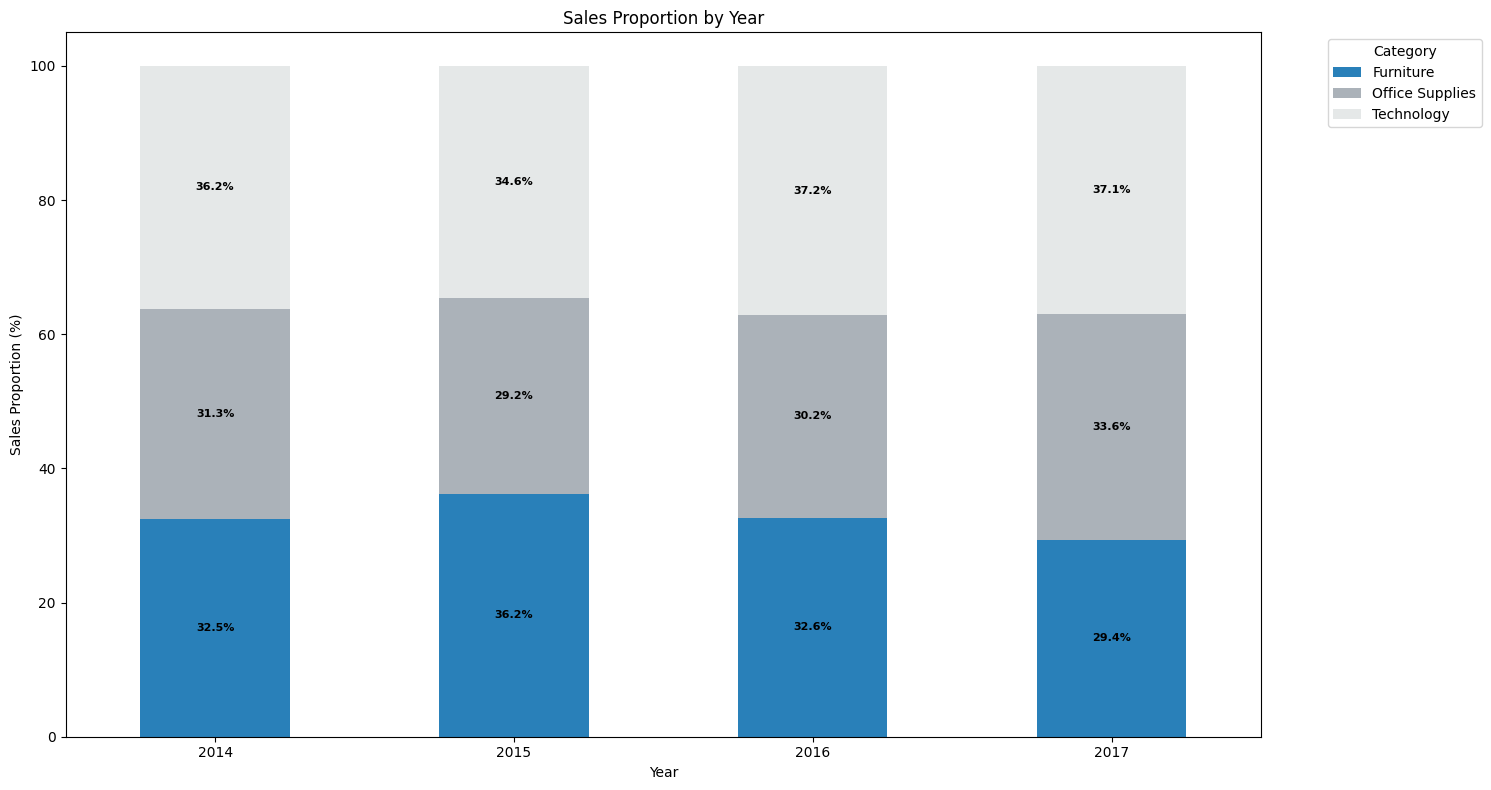

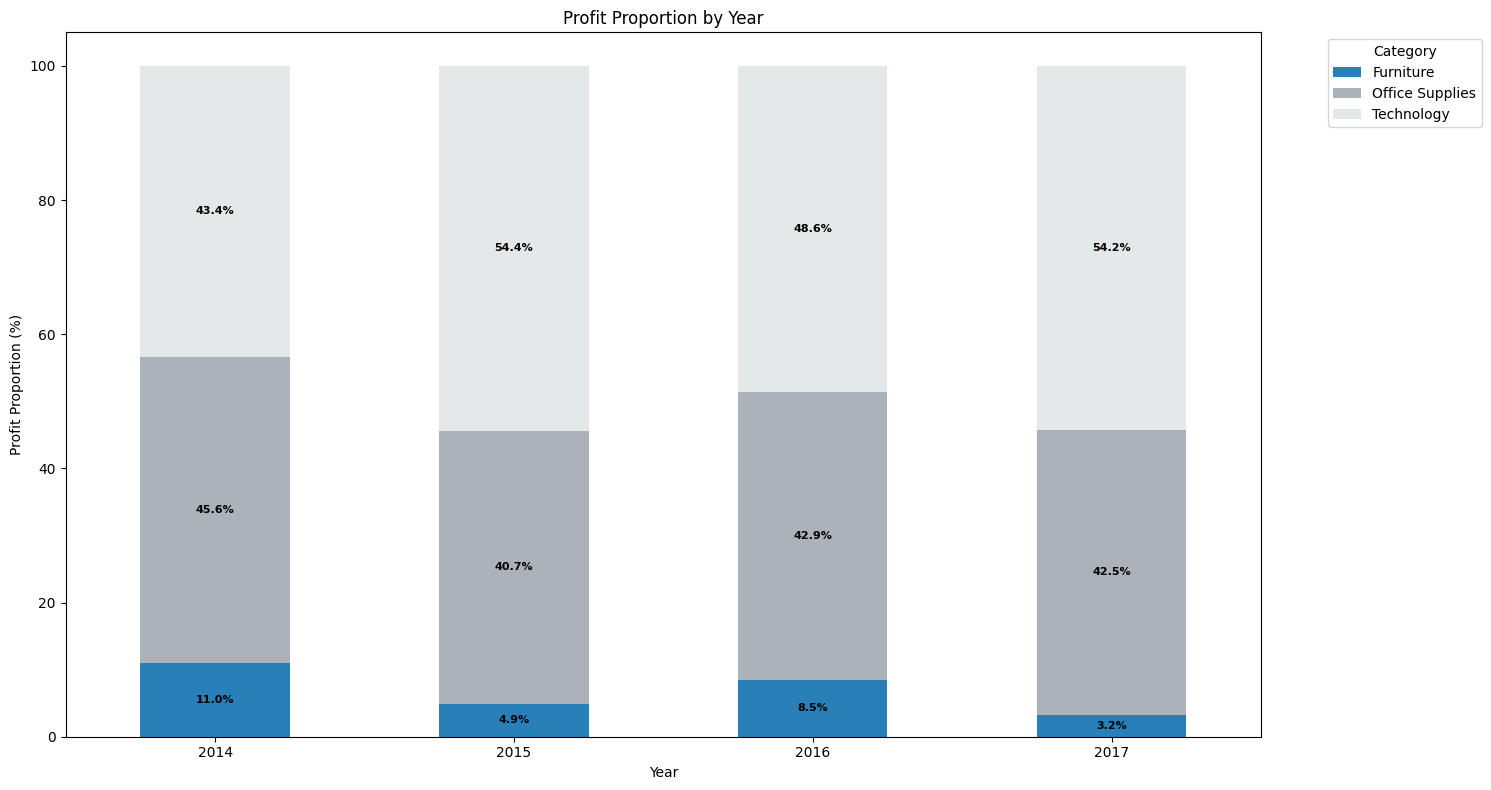

In [ ]:
# Step 1: Pivot the DataFrame to get 'sales_pct' as values
pivot_sales_year = df_product.pivot_table(index='year', columns='category', values='sales_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_sales_prop_year = pivot_sales_year.div(pivot_sales_year.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust as needed for the number of categories)
colors = ['#2980B9','#ABB2B9','#E5E8E8']

# Step 3: Plotting the 100% stacked bar chart for sales percentage
fig, ax = plt.subplots(figsize=(15, 8))

# Create the 100% stacked bar chart
pivot_sales_prop_year.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Sales Proportion by Year')
plt.xlabel('Year')
plt.ylabel('Sales Proportion (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_sales_prop_year.index):  # Loop through each year (x-axis)
    cumulative = 0  # This will store the cumulative height of bars
    for col in pivot_sales_prop_year.columns:  # Loop through each category (stacked bars)
        proportion = pivot_sales_prop_year.loc[x, col]  # Get the height of each bar segment (percentage)
        cumulative += proportion  # Add the current height to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            y_loc = cumulative - (proportion / 2)
            ax.text(n, y_loc, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


# Step 1: Pivot the DataFrame to get 'profit_pct' as values
pivot_profit_year = df_product.pivot_table(index='year', columns='category', values='profit_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_profit_prop_year = pivot_profit_year.div(pivot_profit_year.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust the list based on your actual categories)
colors = ['#2980B9', '#ABB2B9', '#E5E8E8']

# Step 3: Plotting the 100% stacked bar chart for profit percentage
fig, ax = plt.subplots(figsize=(15, 8))

# Create the 100% stacked bar chart
pivot_profit_prop_year.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Profit Proportion by Year')
plt.xlabel('Year')  # Changed from "Quarter" to "Year" for consistency
plt.ylabel('Profit Proportion (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_profit_prop_year.index):  # Loop through each year (x-axis)
    cumulative = 0  # This will store the cumulative height of bars
    for col in pivot_profit_prop_year.columns:  # Loop through each category (stacked bars)
        proportion = pivot_profit_prop_year.loc[x, col]  # Get the height of each bar segment (percentage)
        cumulative += proportion  # Add the current height to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            y_loc = cumulative - (proportion / 2)
            ax.text(n, y_loc, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


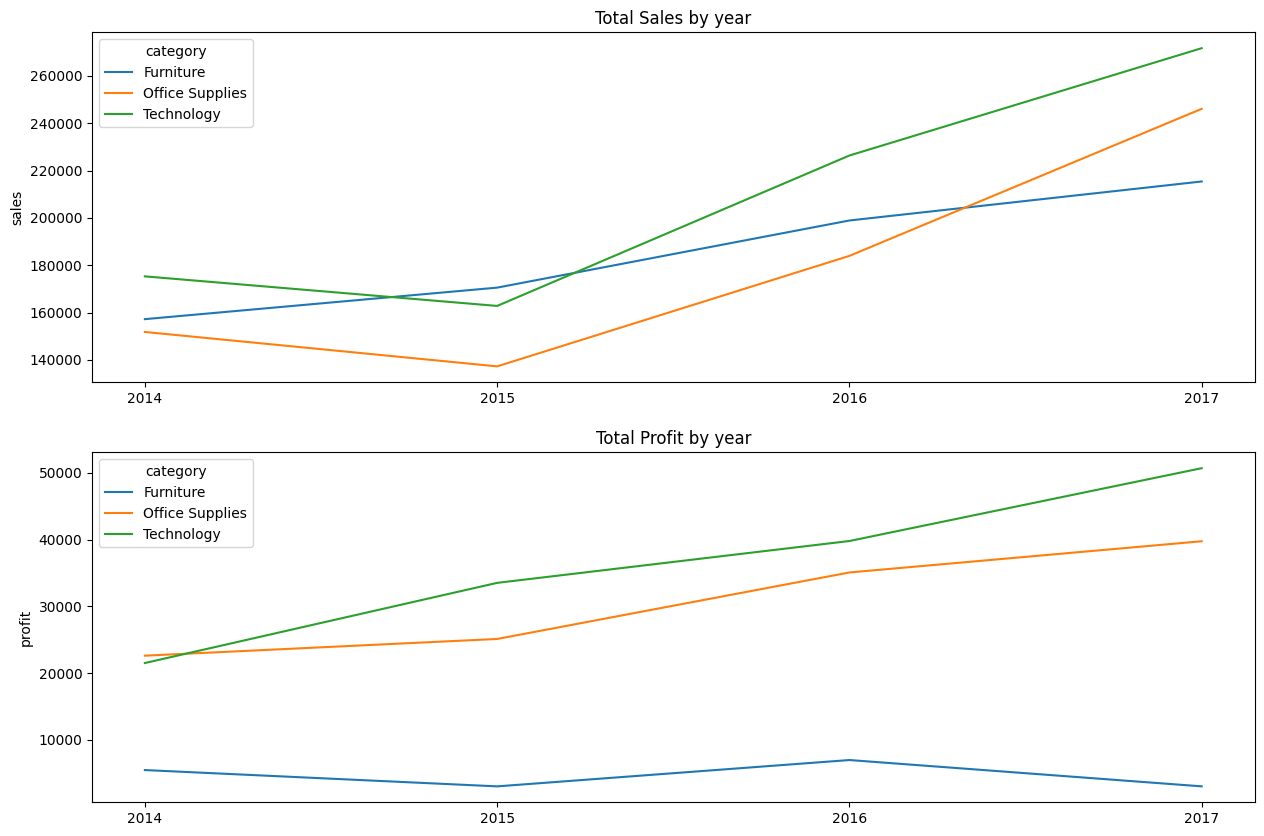

In [ ]:
df_product['year']=df_product['year'].astype(str)
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.lineplot(data=df_product,
             x='year',
             y='sales',
             hue='category')
plt.xlabel('')
plt.title('Total Sales by year')
plt.subplot(212)
sns.lineplot(data=df_product,
             x='year',
             y='profit',
             hue='category')
plt.xlabel('')
plt.title('Total Profit by year')
plt.show()

The chart illustrates the sales and profit proportion across the three product categories from 2014 to 2017. Although the revenue contributions of the three categories are relatively balanced, Technology generates the highest profit proportion, followed by Office Supplies, with Furniture having the lowest profit proportion. **In this report, we will focus on analyzing the Technology category in detail, as it is the largest contributor to overall profit.**

# **Insights:**

Moving forward, df_technology will be used as the main dataframe for our analysis.

In [ ]:
df_technology = df[df['category']=='Technology'].copy()
df_technology['quarter'] = df_technology['quarter'].astype(str)
df_technology

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,quarter
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,2014,2014Q2
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568,2014,2014Q2
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,2014,2014Q3
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741,2016,2016Q1
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2016,2016Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344,2016,2016Q3
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208,2016,2016Q3
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964,2017,2017Q4
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,2017,2017Q4


## *1. Technology's Sub-category Overview*

We will dive into detail about which category had the greatest performance in **Technology category** by analysing the **total values and evaluate how the sales and profit of each sub-category have contributed over the years**.

In [ ]:
df_tech_sub_category = df_technology.groupby(['year','sub_category'])[['sales','profit','quantity']].sum().reset_index()
df_tech_sub_category

,year,sub_category,sales,profit,quantity
0,2014,Accessories,25014.272,6402.7150,580
1,2014,Copiers,10849.782,2912.9433,29
2,2014,Machines,62023.373,369.1689,96
3,2014,Phones,77390.806,11808.0053,684
4,2015,Accessories,40523.960,10197.2752,635
5,2015,Copiers,26179.450,9930.2988,63
6,2015,Machines,27763.697,2977.4856,94
7,2015,Phones,68313.702,10398.8074,697
8,2016,Accessories,41895.854,9664.2885,682
9,2016,Copiers,49599.410,17742.7926,69



We will analyse the total values and evaluate how the sales and profit of each sub-category have contributed over the years.

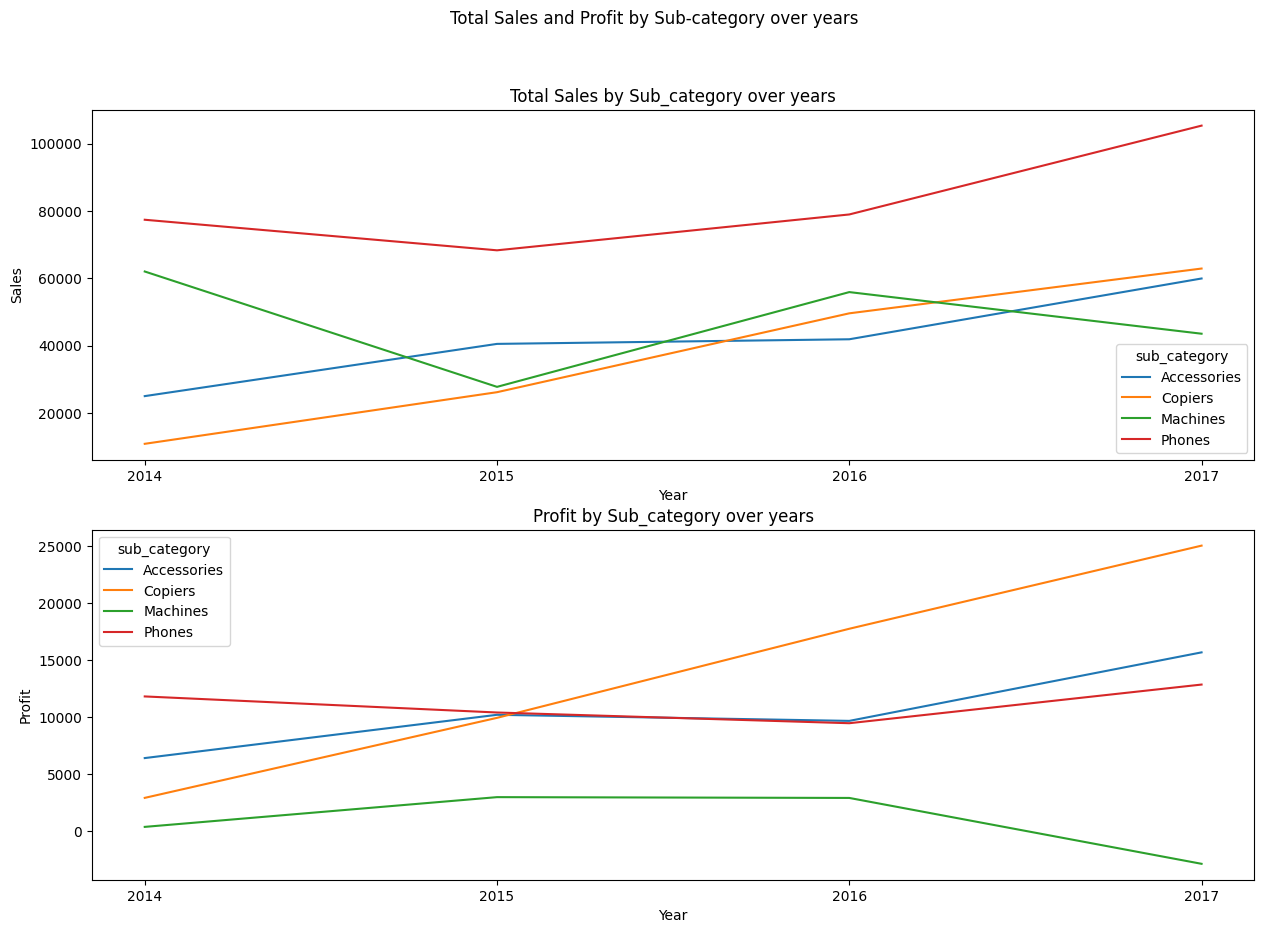

In [ ]:
df_tech_sub_category['year']=df_tech_sub_category['year'].astype(str)
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.lineplot(data=df_tech_sub_category,
             x='year',
             y='sales',
             hue='sub_category')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales by Sub_category over years')

plt.subplot(212)
sns.lineplot(data=df_tech_sub_category,
             x='year',
             y='profit',
             hue='sub_category')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by Sub_category over years')
plt.suptitle('Total Sales and Profit by Sub-category over years')
plt.show()

The chart displays the total sales and profit for each sub-category over the years. While the **Phones** ***sub-category has the highest sales, it does not generate the highest profit*** . In contrast, **Copiers** ***show a consistent increase in sales year over year and has become the top contributor to profit***.

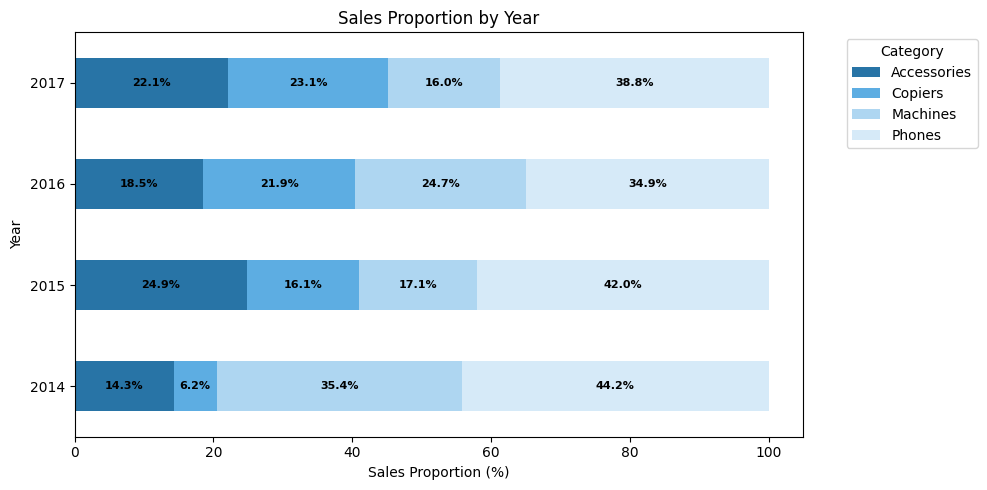

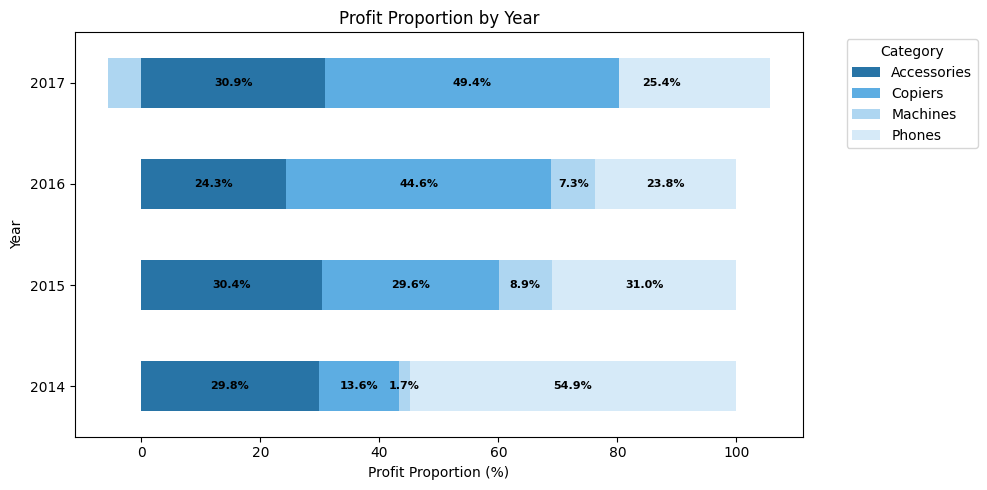

In [ ]:
df_tech_sub_category = calculate_sales_profit_percentage(df_tech_sub_category)
df_tech_sub_category

# Step 1: Pivot the DataFrame to get 'sales_pct' as values
pivot_sales_sub_category = df_tech_sub_category.pivot_table(index='year', columns='sub_category', values='sales_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_sales_sub_category = pivot_sales_sub_category.div(pivot_sales_sub_category.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust as needed for the number of categories)
colors = ['#2874A6', '#5DADE2', '#AED6F1', '#D6EAF8']

# Step 3: Plotting the 100% stacked horizontal bar chart for sales percentage
fig, ax = plt.subplots(figsize=(10, 5))

# Create the 100% stacked horizontal bar chart
pivot_sales_sub_category.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Sales Proportion by Year')
plt.xlabel('Sales Proportion (%)')  # Adjust for horizontal orientation
plt.ylabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_sales_sub_category.index):  # Loop through each year (y-axis)
    cumulative = 0  # This will store the cumulative width of bars
    for col in pivot_sales_sub_category.columns:  # Loop through each category (stacked bars)
        proportion = pivot_sales_sub_category.loc[x, col]  # Get the width of each bar segment (percentage)
        cumulative += proportion  # Add the current width to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            x_loc = cumulative - (proportion / 2)
            ax.text(x_loc, n, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()



# Step 1: Pivot the DataFrame to get 'profit_pct' as values
pivot_profit_sub_category = df_tech_sub_category.pivot_table(index='year', columns='sub_category', values='profit_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_profit_sub_category = pivot_profit_sub_category.div(pivot_profit_sub_category.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust the list based on your actual categories)
colors = ['#2874A6', '#5DADE2', '#AED6F1', '#D6EAF8']

# Step 3: Plotting the 100% stacked horizontal bar chart for profit percentage
fig, ax = plt.subplots(figsize=(10, 5))

# Create the 100% stacked horizontal bar chart
pivot_profit_sub_category.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Profit Proportion by Year')
plt.xlabel('Profit Proportion (%)')  # Adjust for horizontal orientation
plt.ylabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_profit_sub_category.index):  # Loop through each year (y-axis)
    cumulative = 0  # This will store the cumulative width of bars
    for col in pivot_profit_sub_category.columns:  # Loop through each category (stacked bars)
        proportion = pivot_profit_sub_category.loc[x, col]  # Get the width of each bar segment (percentage)
        cumulative += proportion  # Add the current width to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            x_loc = cumulative - (proportion / 2)
            ax.text(x_loc, n, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()



The horizontal bar chart clearly demonstrates that the sales share of **Copiers has grown consistently each year, with its profit contribution peaking in 2017, representing nearly 50% of the total profit across all four sub-categories.**

## *2. Copiers sub-category*

After gaining insights into the revenue and profit of the four sub-categories, **we will now narrow the dataset to focus exclusively on the Copiers sub-category**. This will provide a more detailed understanding of Copiers' performance and characteristics.

In [ ]:
#Filter 'Copiers' dataset
df_copiers = df_technology[df_technology['sub_category'] == 'Copiers'].copy()
df_copiers['unit_price'] = (df_copiers['sales']/df_copiers['quantity'])*(1-df_copiers['discount'])
df_copiers

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,quarter,unit_price
335,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Doug Bickford,Consumer,United States,Los Angeles,California,90045,West,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,2015,2015Q3,383.9936
392,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Jack Garza,Consumer,United States,Des Moines,Washington,98198,West,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883,2014,2014Q3,599.9900
406,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Francisco,California,94110,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,2017,2017Q4,319.9936
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,Montana,59405,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,2017,2017Q1,599.9900
595,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,2014,2014Q3,319.9936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,8821,CA-2017-100622,2017-11-03,2017-11-07,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Orlando,Florida,32839,South,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,959.984,2,0.2,311.9948,2017,2017Q4,383.9936
8990,8991,US-2015-128587,2015-12-24,2015-12-30,Standard Class,HM-14860,Harry Marie,Corporate,United States,Springfield,Missouri,65807,Central,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,4899.930,7,0.0,2302.9671,2015,2015Q4,699.9900
9617,9618,CA-2017-160633,2017-11-16,2017-11-21,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Bowling Green,Ohio,43402,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,899.982,3,0.4,74.9985,2017,2017Q4,179.9964
9839,9840,US-2016-125402,2016-09-25,2016-10-01,Standard Class,DL-12865,Dan Lawera,Consumer,United States,Long Beach,California,90805,West,TEC-CO-10001943,Technology,Copiers,Canon PC-428 Personal Copier,479.976,3,0.2,161.9919,2016,2016Q3,127.9936


### *2.1 Customer segment overview*

Next, we will explore the Customer segments within the Copiers category to gain additional insights.

In [ ]:
df_copiers_customer = df_copiers.groupby(['year','segment'])[['sales','profit']].sum().reset_index()
df_copiers_customer

,year,segment,sales,profit
0,2014,Consumer,9579.816,2502.9528
1,2014,Corporate,719.976,134.9955
2,2014,Home Office,549.990,274.9950
3,2015,Consumer,10599.732,3417.9165
4,2015,Corporate,13229.764,5537.4013
5,2015,Home Office,2349.954,974.9810
6,2016,Consumer,19719.724,4745.9083
7,2016,Corporate,22979.826,9954.9425
8,2016,Home Office,6899.860,3041.9418
9,2017,Consumer,29919.798,13416.9330


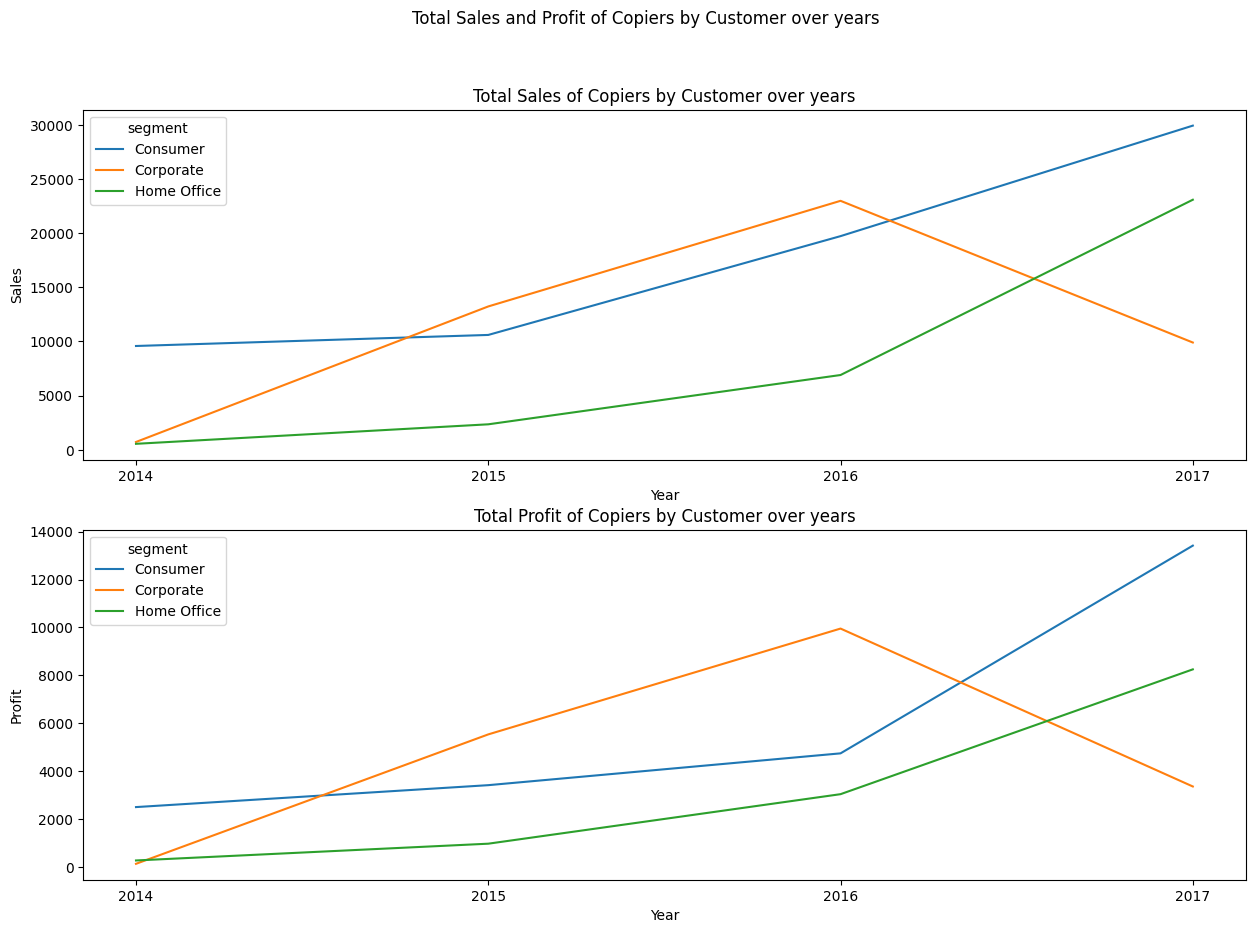

In [ ]:
df_copiers_customer['year']=df_copiers_customer['year'].astype(str)

plt.figure(figsize=(15,10))
plt.subplot(211)
sns.lineplot(data=df_copiers_customer,
             x='year',
             y='sales',
             hue='segment')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales of Copiers by Customer over years')

plt.subplot(212)
sns.lineplot(data=df_copiers_customer,
             x='year',
             y='profit',
             hue='segment')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Total Profit of Copiers by Customer over years')
plt.suptitle('Total Sales and Profit of Copiers by Customer over years')
plt.show()

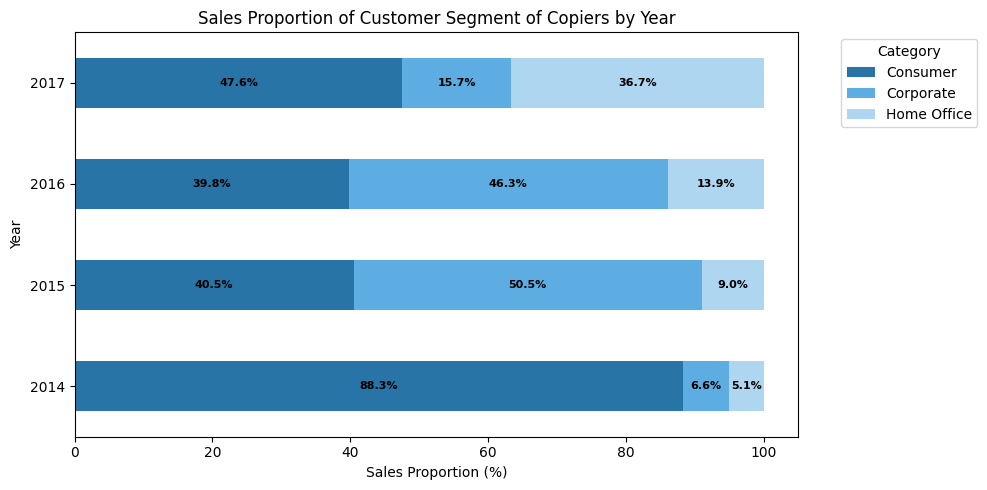

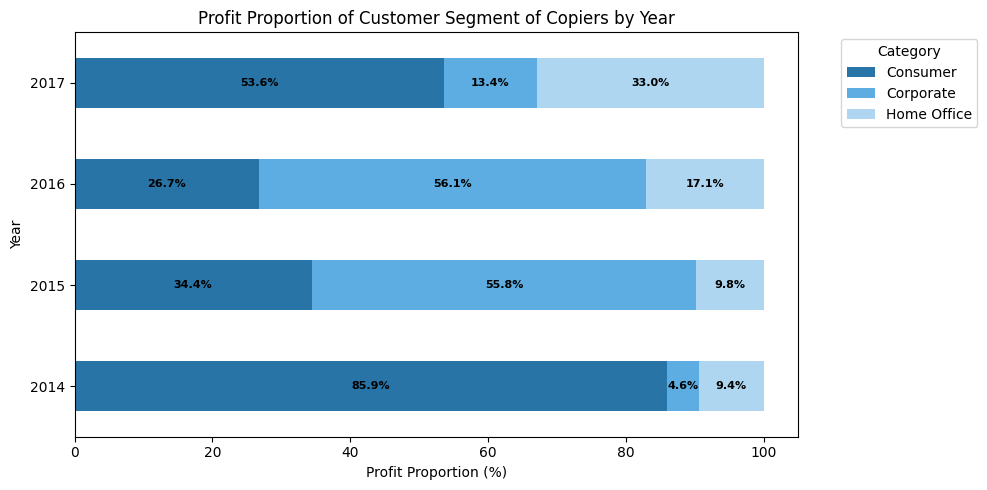

In [ ]:
df_copiers_customer = calculate_sales_profit_percentage(df_copiers_customer)

# SALES PROPORTION OF COPIERS BY YEAR

# Step 1: Pivot the DataFrame to get 'sales_pct' as values
pivot_sales_copiers_customer = df_copiers_customer.pivot_table(index='year', columns='segment', values='sales_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_sales_copiers_customer = pivot_sales_copiers_customer.div(pivot_sales_copiers_customer.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust as needed for the number of categories)
colors = ['#2874A6', '#5DADE2', '#AED6F1', '#D6EAF8']

# Step 3: Plotting the 100% stacked horizontal bar chart for sales percentage
fig, ax = plt.subplots(figsize=(10, 5))

# Create the 100% stacked horizontal bar chart
pivot_sales_copiers_customer.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Sales Proportion of Customer Segment of Copiers by Year')
plt.xlabel('Sales Proportion (%)')  # Switch axes labels since it's horizontal
plt.ylabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_sales_copiers_customer.index):  # Loop through each year (y-axis in barh)
    cumulative = 0  # This will store the cumulative width of bars
    for col in pivot_sales_copiers_customer.columns:  # Loop through each category (stacked bars)
        proportion = pivot_sales_copiers_customer.loc[x, col]  # Get the width of each bar segment (percentage)
        cumulative += proportion  # Add the current width to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            x_loc = cumulative - (proportion / 2)
            ax.text(x_loc, n, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# PROFIT PROPORTION OF COPIERS BY YEAR

# Step 1: Pivot the DataFrame to get 'profit_pct' as values
pivot_profit_copiers_customer = df_copiers_customer.pivot_table(index='year', columns='segment', values='profit_pct', fill_value=0)

# Step 2: Normalize the percentages to ensure they sum to 100%
pivot_profit_copiers_customer = pivot_profit_copiers_customer.div(pivot_profit_copiers_customer.sum(axis=1), axis=0) * 100

# Manually specify colors for each category (adjust as needed)
colors = ['#2874A6', '#5DADE2', '#AED6F1', '#D6EAF8']

# Step 3: Plotting the 100% stacked horizontal bar chart for profit percentage
fig, ax = plt.subplots(figsize=(10, 5))

# Create the 100% stacked horizontal bar chart
pivot_profit_copiers_customer.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Customizing the chart
plt.title('Profit Proportion of Customer Segment of Copiers by Year')
plt.xlabel('Profit Proportion (%)')  # Switch axes labels since it's horizontal
plt.ylabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Adding percentage data labels in the center of each bar segment
for n, x in enumerate(pivot_profit_copiers_customer.index):  # Loop through each year (y-axis in barh)
    cumulative = 0  # This will store the cumulative width of bars
    for col in pivot_profit_copiers_customer.columns:  # Loop through each category (stacked bars)
        proportion = pivot_profit_copiers_customer.loc[x, col]  # Get the width of each bar segment (percentage)
        cumulative += proportion  # Add the current width to cumulative for correct positioning

        if proportion > 0:  # Only label non-zero bars
            # Position the text in the middle of the bar segment
            x_loc = cumulative - (proportion / 2)
            ax.text(x_loc, n, f'{np.round(proportion, 1)}%',
                    ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

**Consumer:**

*   Revenue and Profit have shown steady growth over the years, particularly from 2016 to 2017.

*   As the primary customer segment, it contributes the most to Copiers' overall revenue and profit.

**Corporate:**

*   Revenue growth was strong from 2014 through 2016, with a slight decline in 2017.
*   This segment has strong potential but profit growth has been unstable, with some year-to-year fluctuations.

**Home Office:**

*  Revenue growth has been the slowest among the segments.
*  Profit growth is stable but remains low.






### *2.2 Region overview*

Following, we will look at Copiers' regional sales.

In [ ]:
#Filter the copiers data by region:
df_copiers_region_year = df_copiers.groupby(['year', 'region'])[['sales', 'profit']].sum().reset_index()
df_copiers_region_year

,year,region,sales,profit
0,2014,Central,3269.926,1034.9780
1,2014,East,4099.926,650.9887
2,2014,South,479.984,89.9970
3,2014,West,2999.946,1136.9796
4,2015,Central,12809.766,5159.9078
5,2015,East,4959.896,1654.9667
6,2015,South,899.970,314.9895
7,2015,West,7509.818,2800.4348
8,2016,Central,17499.950,8399.9760
9,2016,East,19759.770,5143.9248


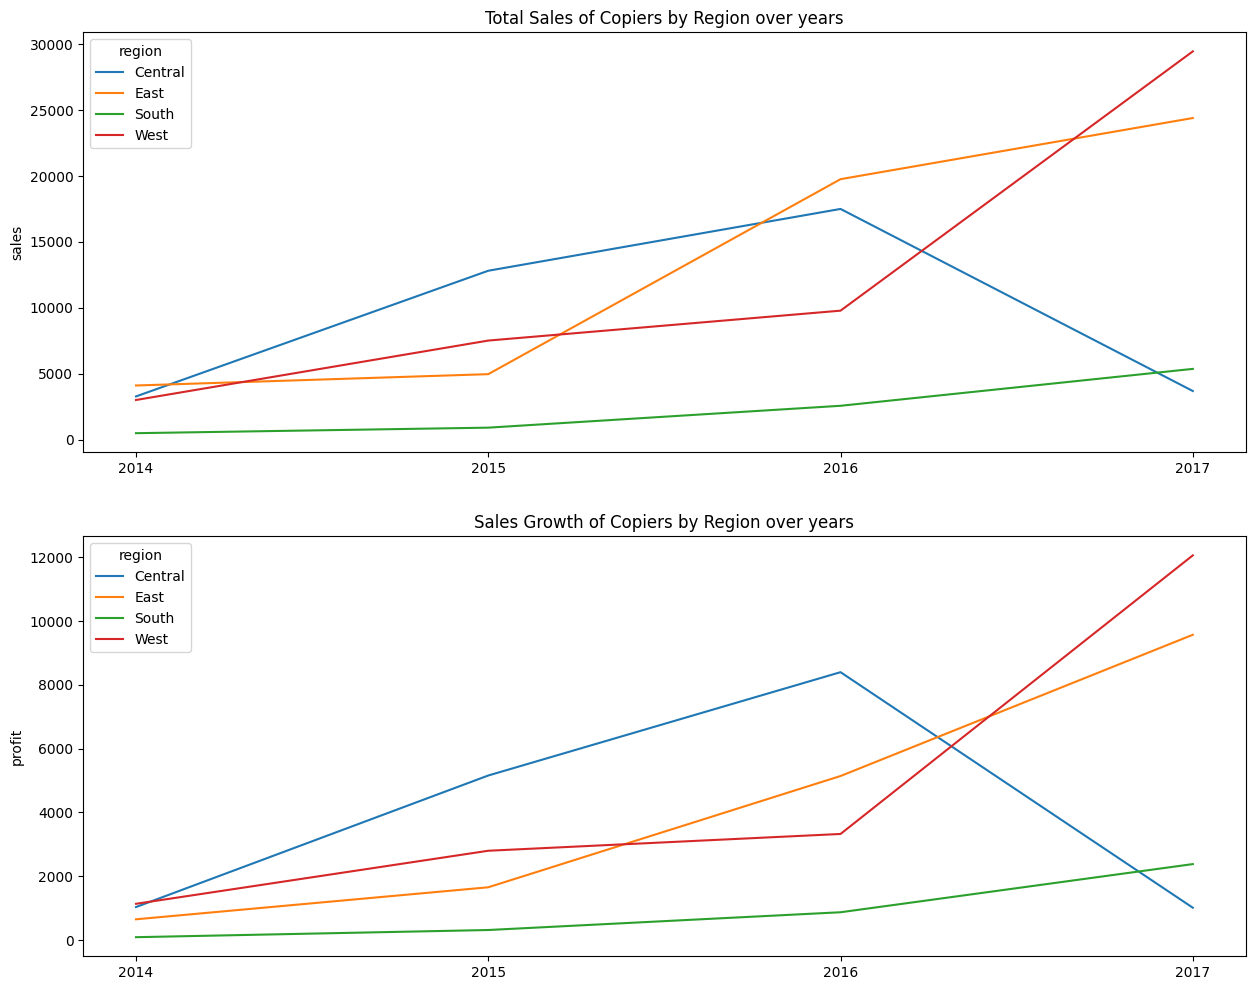

In [ ]:
#Visualise:
df_copiers_region_year['year']=df_copiers_region_year['year'].astype(str)
plt.figure(figsize=(15,12))
plt.subplot(211)
sns.lineplot(data=df_copiers_region_year,
             x='year',
             y='sales',
             hue='region')
plt.xlabel('')
plt.title('Total Sales of Copiers by Region over years')
plt.subplot(212)
sns.lineplot(data=df_copiers_region_year,
             x='year',
             y='profit',
             hue='region')
plt.title('Total Profit of Copiers by Region over years')
plt.xlabel('')
plt.title('Sales Growth of Copiers by Region over years')
plt.xlabel('')
plt.show()


**Overview:**



*   ***Sales & Profit:***  Copiers’ sales and revenue have steadily increased across all regions over the years. The West and East regions consistently lead in sales, positioning them as the strongest markets. Meanwhile, the Central region saw considerable sales growth from 2014 to 2016 but experienced a sharp decline in 2017, causing notable fluctuations in profit. Although the sales and profits are the lowest, there are times of good growth in South regions.


**Conclusions:**



*   ***West and East region:*** The main markets for Copiers with the highest sales and profits. These two markets need to be maintained and developed.
*   ***Central region:*** potential but is unstable market.
* ***South region:*** The sales and profits are the lowest.

=> Therefore, to better understand the characteristics and reasons for regional differences, **we categorise the regions into two groups: high-sales regions (East and West) and low-sales regions (Central and South)**.







## 3.High-sales regions


For ease of analysis, the brand_name column has been created based on the product_name column.

In [ ]:
# Filter data of West and East regions for the High-sales dataset
df_copiers_high_sales = df_copiers[(df_copiers['region']=='West') | (df_copiers['region']=='East')].copy()

# Write a function to get the brand name for future analysis:
def get_brand_name(product_name):
    brand_name = product_name.split(' ')[0]
    return brand_name
df_copiers_high_sales['brand_name'] = df_copiers_high_sales['product_name'].apply(get_brand_name)
df_copiers_high_sales

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,quarter,unit_price,brand_name
335,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Doug Bickford,Consumer,United States,Los Angeles,California,90045,West,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,2015,2015Q3,383.9936,Hewlett
392,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Jack Garza,Consumer,United States,Des Moines,Washington,98198,West,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883,2014,2014Q3,599.9900,Canon
406,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Francisco,California,94110,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,2017,2017Q4,319.9936,Sharp
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,Montana,59405,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,2017,2017Q1,599.9900,Canon
595,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,2014,2014Q3,319.9936,Sharp
753,754,CA-2016-110499,2016-04-07,2016-04-09,First Class,YC-21895,Yoseph Carroll,Corporate,United States,San Francisco,California,94110,West,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,1199.976,3,0.2,374.9925,2016,2016Q2,319.9936,Hewlett
1233,1234,CA-2016-153682,2016-05-30,2016-06-01,First Class,BG-11695,Brooke Gillingham,Corporate,United States,Cincinnati,Ohio,45231,East,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,839.988,2,0.4,69.9990,2016,2016Q2,251.9964,Canon
1549,1550,CA-2014-134278,2014-07-06,2014-07-08,First Class,EP-13915,Emily Phan,Consumer,United States,New York City,New York,10011,East,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,559.992,1,0.2,174.9975,2014,2014Q3,447.9936,Canon
1644,1645,CA-2015-111829,2015-03-19,2015-03-20,First Class,FH-14365,Fred Hopkins,Corporate,United States,Seattle,Washington,98115,West,TEC-CO-10001766,Technology,Copiers,Canon PC940 Copier,3149.930,7,0.0,1480.4671,2015,2015Q1,449.9900,Canon
1986,1987,CA-2016-147417,2016-07-25,2016-07-27,First Class,CB-12415,Christy Brittain,Consumer,United States,Columbus,Ohio,43229,East,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,1439.976,4,0.4,191.9968,2016,2016Q3,215.9964,Hewlett


### 3.1 Customer Segment

In [ ]:
#Filter High-sales regions by Customer Segment:
df_copiers_high_sales_segment = df_copiers_high_sales.groupby(['year','segment'])['sales'].sum().reset_index()
df_copiers_high_sales_segment

,year,segment,sales
0,2014,Consumer,7099.872
1,2015,Consumer,8079.808
2,2015,Corporate,3589.922
3,2015,Home Office,799.984
4,2016,Consumer,18119.804
5,2016,Corporate,4519.908
6,2016,Home Office,6899.860
7,2017,Consumer,27559.834
8,2017,Corporate,4179.926
9,2017,Home Office,22119.786


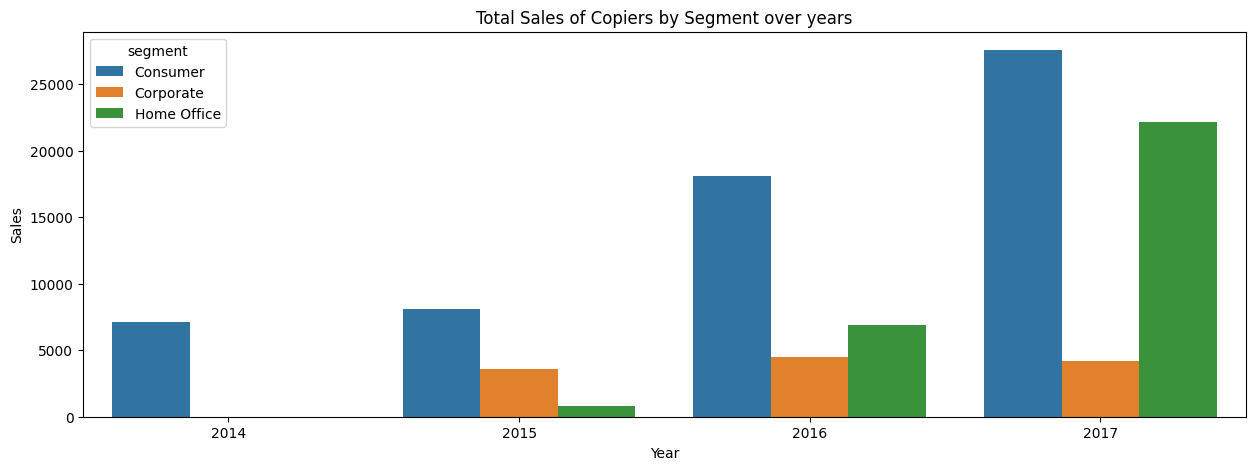

In [ ]:
df_copiers_high_sales_segment['year']=df_copiers_high_sales_segment['year'].astype(str)
plt.figure(figsize=(15,5))
sns.barplot(data=df_copiers_high_sales_segment,
             x='year',
             y='sales',
             hue='segment')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales of Copiers by Segment over years')
plt.show()


The chart shows the total sales from copiers by customer segment (Consumer, Corporate, Home Office) over the years (2014-2017).

***Consumer:*** This segment consistently dominates revenue in all years, indicating that this is the most important customer segment for copiers.

***Home Office:*** This segment has shown strong growth, especially from 2015 to 2017, highlighting its potential for development.

***Corporate:*** This segment has the lowest revenue and the slowest growth among the three segments.


=> It can be concluded that **Consumer and Home Office are the two main customer segments that generate high revenue in high-sales regions.**

According to Kurt Badenhausen's analysis in Forbes(2018), ***California, New York, and Massachusetts*** received the ***majority—76%—of venture capital (VC) investments in 2017***, with Silicon Valley, New York City, and Boston being the primary recipients. This reflects a steady increase from 72% in 2012 and 64% a decade ago, based on data from the National Venture Capital Association. This ongoing trend underscores how the East and West Coasts have maintained their roles as innovation hubs, consistently attracting funding and resources. The steady increase in VC concentration since 2012 also suggests a sustained growth of the startup ecosystem in these regions, ***leading to high demand for office essentials like copiers among small businesses and home offices.***

Source: Badenhausen, K. (2018). The Top 10 Rising Cities For Startups. Forbes. [online] 1 Oct. Available at: https://www.forbes.com/sites/kurtbadenhausen/2018/10/01/the-top-10-rising-cities-for-startups/.

### 3.2 Product segment

We will now move to the Product segment to identify which brand generates the highest sales, analyse how prices have changed over the years, and assess whether price changes and discounts influence customer purchases.

In [ ]:
# Filter the data based on brand_name over years:
df_copiers_high_sales_product = df_copiers_high_sales.groupby(['year','brand_name'])[['sales','unit_price','discount','quantity','profit']].agg({'sales':'sum', 'unit_price': 'mean', 'discount': 'mean','quantity': 'sum','profit': 'sum'}).reset_index()

# Calculate the growth of price over years:
df_copiers_high_sales_product['price_growth'] = df_copiers_high_sales_product.groupby('brand_name')['unit_price'].pct_change() * 100
df_copiers_high_sales_product

,year,brand_name,sales,unit_price,discount,quantity,profit,price_growth
0,2014,Canon,3439.938,403.326667,0.200000,8,1002.9830,NaN
1,2014,Hewlett,1799.970,215.996400,0.400000,5,239.9960,NaN
2,2014,Sharp,1859.964,258.995000,0.300000,5,544.9893,NaN
3,2015,Brother,1199.960,191.993600,0.200000,5,224.9925,NaN
4,2015,Canon,4909.882,341.992400,0.133333,13,2074.4509,-15.207094
5,2015,Hewlett,2239.952,298.660267,0.200000,6,645.9874,38.270946
6,2015,Sharp,4119.920,341.326933,0.200000,10,1509.9707,31.789005
7,2016,Brother,479.984,191.993600,0.200000,2,89.9970,0.000000
8,2016,Canon,15319.860,507.194720,0.280000,19,3241.9607,48.305845
9,2016,Hewlett,12539.752,405.991667,0.100000,27,4958.9041,35.937623


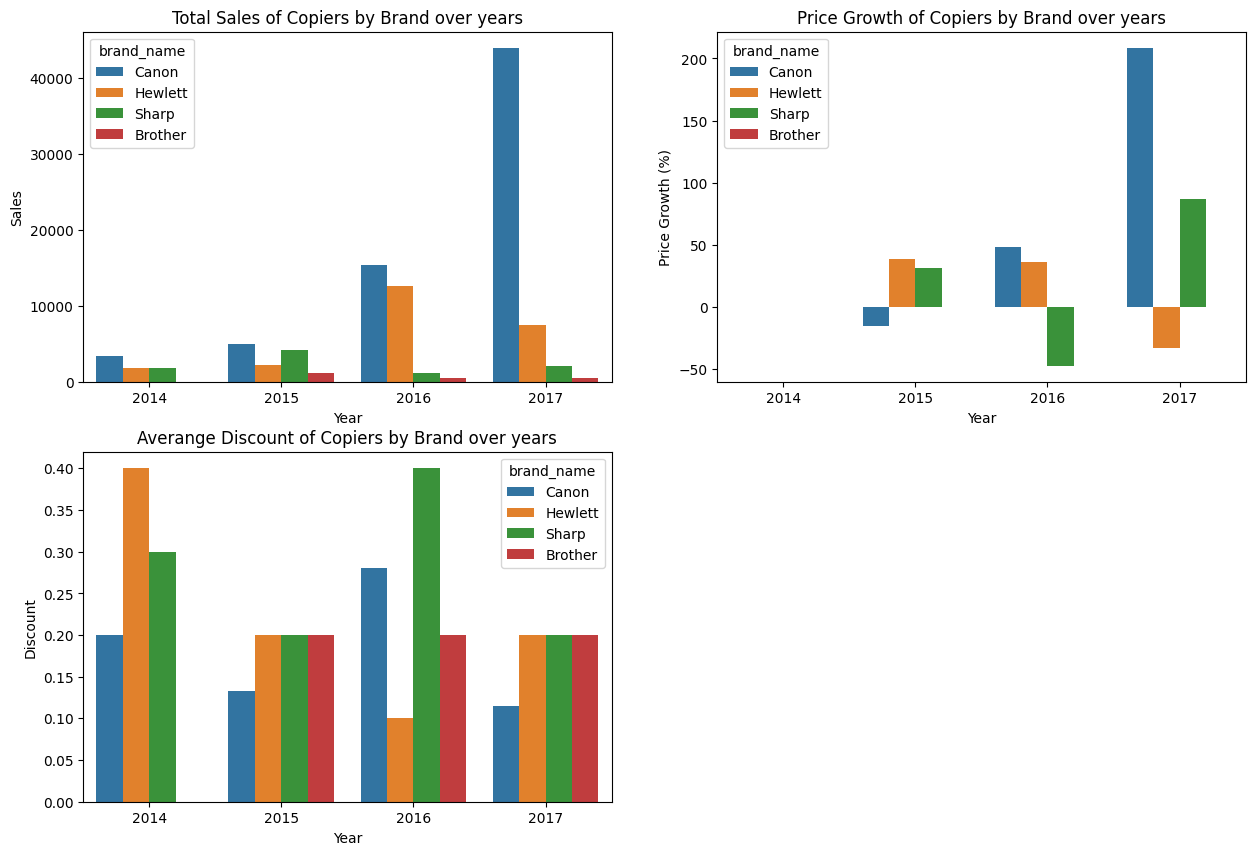

In [ ]:
df_copiers_high_sales_product['year']=df_copiers_high_sales_product['year'].astype(str)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data=df_copiers_high_sales_product,
             x='year',
             y='sales',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales of Copiers by Brand over years')
plt.subplot(222)
sns.barplot(data=df_copiers_high_sales_product,
             x='year',
             y='price_growth',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Price Growth (%)')
plt.title('Price Growth of Copiers by Brand over years')
plt.subplot(223)
sns.barplot(data=df_copiers_high_sales_product,
             x='year',
             y='discount',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Discount')
plt.title('Averange Discount of Copiers by Brand over years')
plt.show()

The chart indicates that **Canon** is the top-selling brand, showing substantial sales growth. Despite sharp annual price increases (with prices doubling and discount values decreasing in 2017), consumer demand for Canon has remained steady. Hewlett Packard (HP) ranks second, showing strong growth in 2016 but experiencing a slight decreased in 2017. The Sharp and Brother brands, however, are less favored in the Consumer and Home Office segments within the West and East regions.

Moreover, there appears to be a clear inverse relationship between discount rates and sales. For example, in 2016 and 2017, Canon reduced its discount from 28% to 11.43%, yet its sales peaked in 2017. Conversely, HP increased its discount rate from 10% in 2016 to 20% in 2017, but HP's sales still declined in 2017 compared to 2016.


=> The charts indicate that **Canon is a highly recognized brand** that generates significant revenue for the business. Its **main customers are in the Consumer and Home Office** segments, **who are less concerned about price and discounts**.

## 4.Low-sales regions

In [ ]:
# Filter data of West and East regions for the High-sales dataset
df_copiers_low_sales = df_copiers[(df_copiers['region']=='South') | (df_copiers['region']=='Central')].copy()

# Write a function to get the brand name for future analysis:
df_copiers_low_sales['brand_name'] = df_copiers_low_sales['product_name'].apply(get_brand_name)
df_copiers_low_sales

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,quarter,unit_price,brand_name
1150,1151,CA-2015-112452,2015-04-04,2015-04-04,Same Day,NC-18340,Nat Carroll,Consumer,United States,Lansing,Michigan,48911,Central,TEC-CO-10004202,Technology,Copiers,Brother DCP1000 Digital 3 in 1 Multifunction M...,599.980,2,0.0,209.9930,2015,2015Q2,299.9900,Brother
2897,2898,US-2016-164630,2016-01-04,2016-01-09,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,North Carolina,28205,South,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,0.2,119.9960,2016,2016Q1,191.9936,Hewlett
3055,3056,US-2015-100377,2015-08-28,2015-09-01,Standard Class,TS-21370,Todd Sumrall,Corporate,United States,Chicago,Illinois,60623,Central,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,2799.960,5,0.2,874.9875,2015,2015Q3,447.9936,Canon
3704,3705,CA-2015-104941,2015-06-13,2015-06-19,Standard Class,DH-13075,Dave Hallsten,Corporate,United States,Decatur,Alabama,35601,South,TEC-CO-10004202,Technology,Copiers,Brother DCP1000 Digital 3 in 1 Multifunction M...,899.970,3,0.0,314.9895,2015,2015Q2,299.9900,Brother
4072,4073,CA-2015-156104,2015-12-06,2015-12-08,Second Class,NP-18685,Nora Pelletier,Home Office,United States,Indianapolis,Indiana,46203,Central,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,999.980,2,0.0,449.9910,2015,2015Q4,499.9900,Hewlett
4286,4287,CA-2015-105690,2015-11-21,2015-11-26,Second Class,CA-11965,Carol Adams,Corporate,United States,Port Arthur,Texas,77642,Central,TEC-CO-10001571,Technology,Copiers,Sharp 1540cs Digital Laser Copier,439.992,1,0.2,164.9970,2015,2015Q4,351.9936,Sharp
4639,4640,CA-2016-102162,2016-09-11,2016-09-16,Standard Class,JF-15565,Jill Fjeld,Consumer,United States,Newport News,Virginia,23602,South,TEC-CO-10001943,Technology,Copiers,Canon PC-428 Personal Copier,1599.920,8,0.0,751.9624,2016,2016Q3,199.9900,Canon
5068,5069,CA-2014-124478,2014-08-08,2014-08-12,Standard Class,MA-17560,Matt Abelman,Home Office,United States,Trenton,Michigan,48183,Central,TEC-CO-10001571,Technology,Copiers,Sharp 1540cs Digital Laser Copier,549.990,1,0.0,274.9950,2014,2014Q3,549.9900,Sharp
5562,5563,CA-2017-133263,2017-03-31,2017-04-02,Second Class,JE-15610,Jim Epp,Corporate,United States,Atlanta,Georgia,30318,South,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2999.950,5,0.0,1439.9760,2017,2017Q1,599.9900,Hewlett
5568,5569,CA-2017-157966,2017-03-13,2017-03-13,Same Day,SU-20665,Stephanie Ulpright,Home Office,United States,Chicago,Illinois,60610,Central,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,2017,2017Q1,383.9936,Hewlett


### 4.1 Customer Segment:

In [ ]:
df_copiers_low_sales_segment = df_copiers_low_sales.groupby(['year','segment'])[['sales','unit_price','discount']].agg({'sales': 'sum', 'unit_price': 'mean', 'discount': 'mean'}).reset_index()
df_copiers_low_sales_segment

,year,segment,sales,unit_price,discount
0,2014,Consumer,2479.944,255.993600,0.200000
1,2014,Corporate,719.976,191.993600,0.200000
2,2014,Home Office,549.990,549.990000,0.000000
3,2015,Consumer,2519.924,238.659067,0.133333
4,2015,Corporate,9639.842,479.991440,0.080000
5,2015,Home Office,1549.970,524.990000,0.000000
6,2016,Consumer,1599.920,199.990000,0.000000
7,2016,Corporate,18459.918,1845.991800,0.100000
8,2017,Consumer,2359.964,541.991800,0.100000
9,2017,Corporate,5719.894,370.659067,0.133333


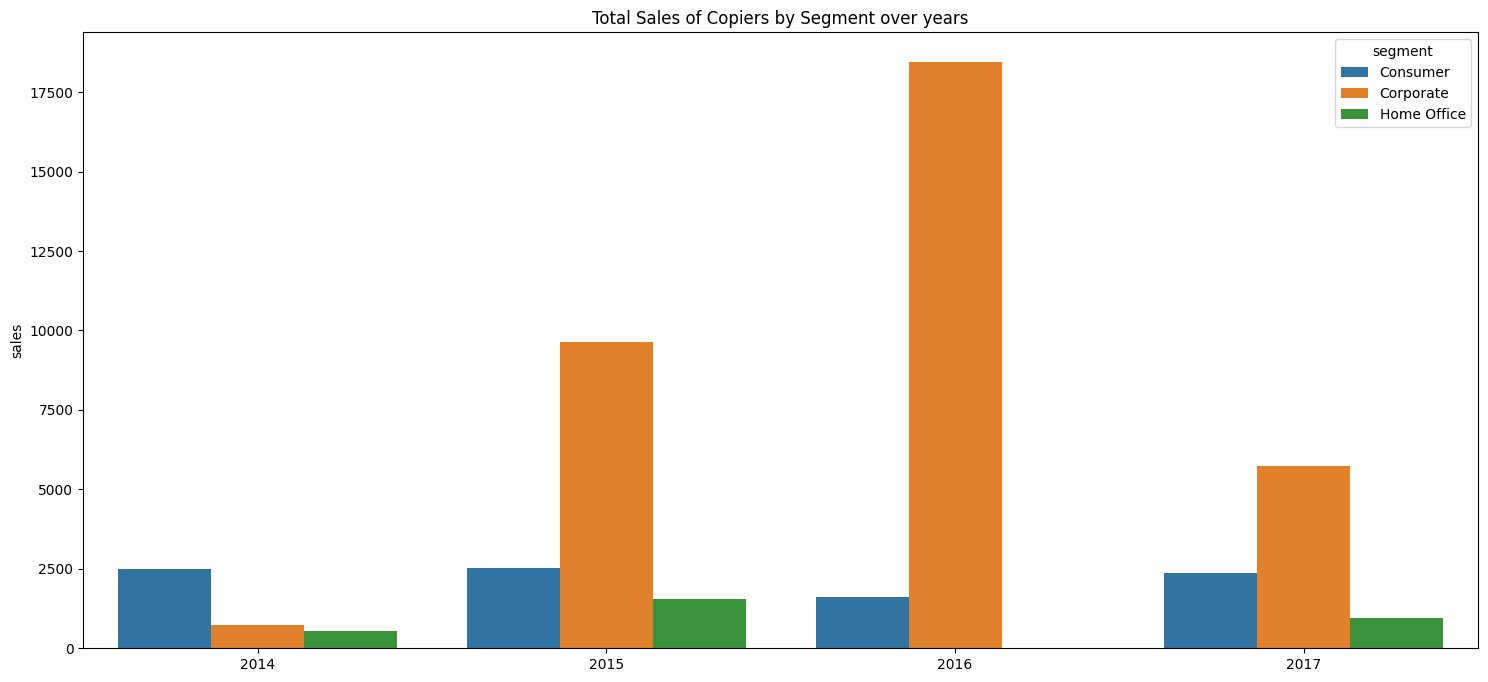

In [ ]:
df_copiers_low_sales_segment['year'] = df_copiers_low_sales_segment['year'].astype(str)
plt.figure(figsize=(18,8))
sns.barplot(data=df_copiers_low_sales_segment,
             x='year',
             y='sales',
             hue='segment')
plt.xlabel('')
plt.title('Total Sales of Copiers by Segment over years')
plt.show()

In contrast to the high-sales regions, from 2014 to 2017, the **Corporate** segment consistently had the highest copier sales compared to the Consumer and Home Office segments. This indicates a strong demand for copiers in corporate environments. However, sales saw a slight decline in 2017.

###4.2 Product Segment

In [ ]:
df_copiers_low_sales_product = df_copiers_low_sales.groupby(['year','brand_name'])[['sales','unit_price','discount','quantity','profit']].agg({'sales':'sum', 'unit_price': 'mean', 'discount': 'mean','quantity': 'sum','profit': 'sum'}).reset_index()
df_copiers_low_sales_product['price_growth'] = df_copiers_low_sales_product.groupby('brand_name')['unit_price'].pct_change() * 100
df_copiers_low_sales_product['discount_growth'] = df_copiers_low_sales_product.groupby('brand_name')['discount'].pct_change() * 100
df_copiers_low_sales_product

,year,brand_name,sales,unit_price,discount,quantity,profit,price_growth,discount_growth
0,2014,Brother,1199.960,191.99360,0.20,5,224.9925,NaN,NaN
1,2014,Hewlett,1999.960,319.99360,0.20,5,624.9875,NaN,NaN
2,2014,Sharp,549.990,549.99000,0.00,1,274.9950,NaN,NaN
3,2015,Brother,1499.950,299.99000,0.00,5,524.9825,56.250000,-100.0
4,2015,Canon,10219.824,432.79216,0.12,20,4059.9318,NaN,NaN
5,2015,Hewlett,999.980,499.99000,0.00,2,449.9910,56.250000,-100.0
6,2015,Sharp,989.982,450.99180,0.10,2,439.9920,-18.000000,inf
7,2016,Canon,19099.870,1849.99000,0.00,13,9151.9384,327.454601,-100.0
8,2016,Hewlett,959.968,191.99360,0.20,4,119.9960,-61.600512,inf
9,2017,Canon,5079.908,398.99270,0.15,11,1619.9709,-78.432710,inf


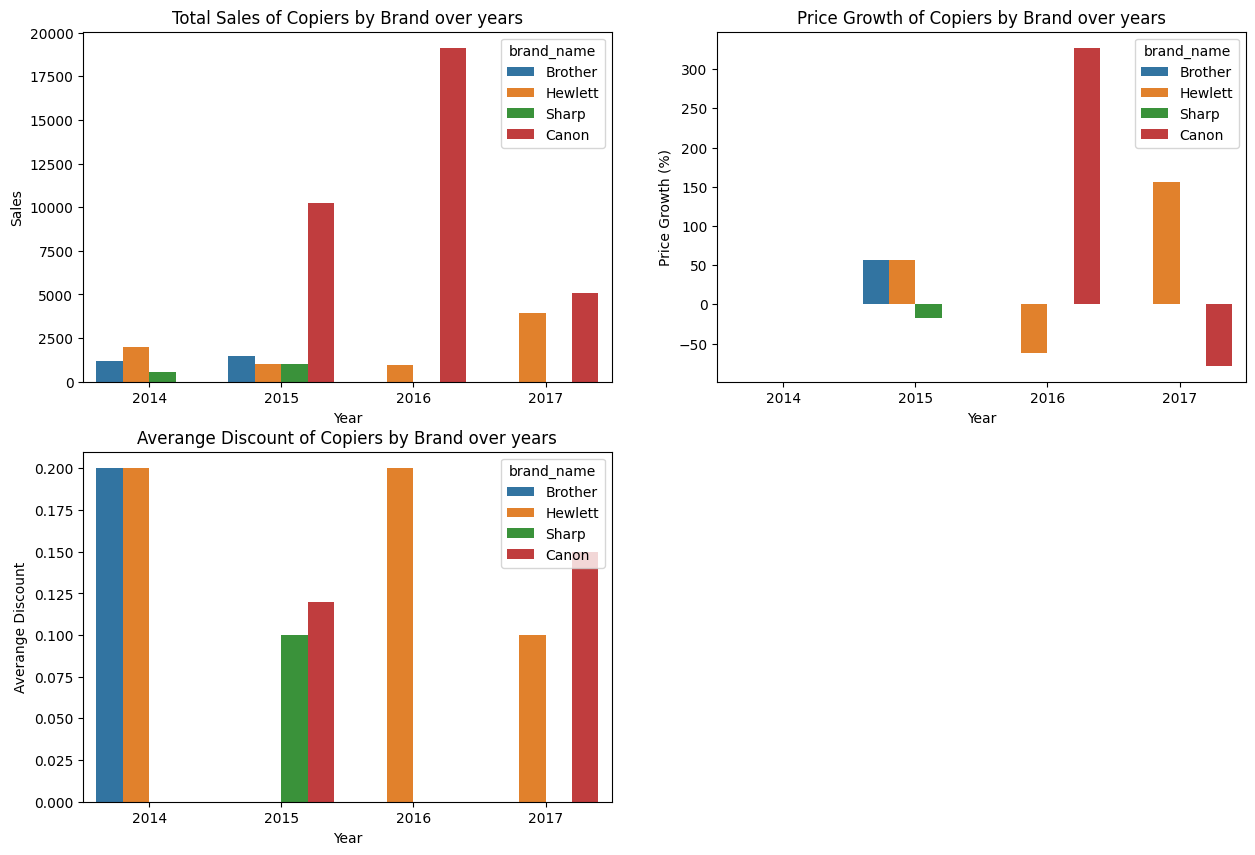

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data=df_copiers_low_sales_product,
             x='year',
             y='sales',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales of Copiers by Brand over years')
plt.subplot(222)
sns.barplot(data=df_copiers_low_sales_product,
             x='year',
             y='price_growth',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Price Growth (%)')
plt.title('Price Growth of Copiers by Brand over years')
plt.subplot(223)
sns.barplot(data=df_copiers_low_sales_product,
             x='year',
             y='discount',
             hue='brand_name')
plt.xlabel('Year')
plt.ylabel('Averange Discount')
plt.title('Averange Discount of Copiers by Brand over years')
plt.show()

Overall, **Canon remained the best-selling copier brand** in the low-sales regions from 2015 to 2017, especially in 2016 with outstanding sales. Additionally, **Hewlett Packard (HP) showed strong growth from 2016 to 2017**.
Although both Canon and HP **raised prices** in 2016 and 2017, respectively, this did not impact the sales. Even **discount is not the reason impacting the sales and profit** in low-sales regions.

Furthermore, the copier market has undergone notable changes since 2015, marked by Canon’s dominance and intensified competition between Canon and HP. Sharp and Brother have withdrawn from the market, indicating the **fierce competition** within the industry in low-sales regions.

## 5.Recommendations

Based on the insights derived from the dataset, here are strategic recommendations to maximize profitability for Superstore, outlined in a business-oriented manner:

**Key Insights**

***1. High Profitability of Copier Products:*** Although Copiers are sold in much smaller quantities compared to the Phones category, they yield the highest profit for Superstore. This indicates that **Copiers are a special product line, distinct from FMCGs, with a long lifecycle, high investment value, and substantial profit margins.**


***2. East and West Regions (High Revenue):***

*   **Main Customers:** Consumer and Home Office segments, with Home Office showing strong growth potential.

*   **Pricing Insensitivity:** Sales growth remains strong even when prices rise or discounts are reduced.

*   **Brand Dynamics:** Canon dominates the Copier market, followed by HP, Sharp, and Brother.

***3. South and Central Regions (Lower Revenue):***

*   **Main Customers:** Corporate segment, but with fluctuating and declining growth.
*   ***Pricing Insensitivity:*** Similar to other regions, Corporate consumers are not sensitive to pricing or discounts.

*   **Brand Competition:** Canon and HP have emerged as the primary competitors in the Copier market from 2016 onward.



**Recommendations**

**1. Focus on High Revenue Areas (East and West):**

*  ***Prioritise Home Office Segment:*** Promote Copiers products from Canon and HP (with features like fast printing, compact design, and mobile connectivity).
* ***Leverage Brand Leadership:*** Capitalise on the dominance of Canon and HP in these regions to maintain brand preference and customer trust.
* ***Reduce Discounts:*** As sales are not sensitive to discounts in these regions, focus on maintaining consistent pricing while emphasising product quality and value.

**2. Drive Growth in Low Revenue Areas (South and Central):**

*  ***Target Corporate Segment:*** Tailor marketing efforts towards corporate customers, who are the primary revenue contributors in these regions, even with fluctuating sales patterns.
*  ***Strategic Pricing:*** Maintain competitive pricing without heavy reliance on discounts, as discounts were not identified as a key driver of sales.




## Import to Google Sheet Report and Design a Tableau Dashboard

In [ ]:
# Mount to Google Sheets
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('Project')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ...
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)

    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key

# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'Sales&Profit', df_total_sales_profit)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'SalesbyProduct', df_product)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'TechSalesbySub-category', df_tech_sub_category)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopiersSales', df_copiers)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierSalesbyCustomer', df_copiers_customer)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierSalesbyRegionYear', df_copiers_region_year)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierSalesbyRegionQuarter', df_copiers_region_quarter)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierHighRegionsSales', df_copiers_high_sales)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierHighRegionsSalesbyCustomer', df_copiers_high_sales_segment)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierHighRegionsSalesbyProduct', df_copiers_high_sales_product)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierHighRegionsSalesbyProductName', df_copiers_high_sales_product_name)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierLowRegionsSales', df_copiers_low_sales)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierLowRegionsSalesbyCustomer', df_copiers_low_sales_segment)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierLowRegionsSalesbyProduct', df_copiers_low_sales_product)
# export_data_to_new_sheet('1tdgUbCD_SYUiTpClpmNHKXkZOpZNnxfM01kvZoQYbYk', 'CopierLowRegionsSalesbyProductName', df_copiers_low_sales_product_name)
